In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
os.chdir("..")

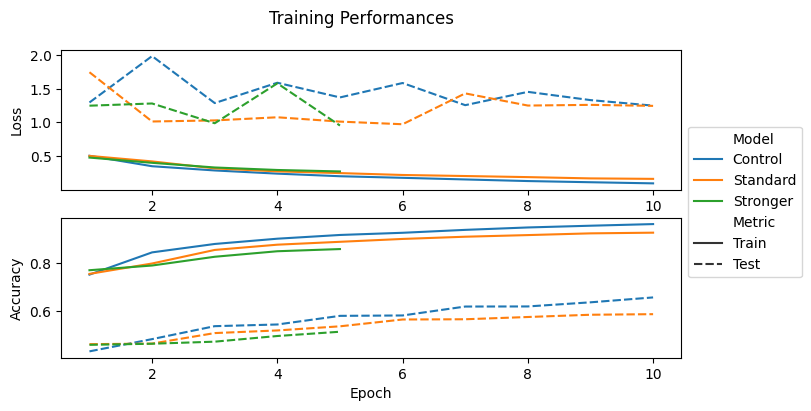

In [9]:
control = pd.read_csv("logs/Control/logs.csv")
control["Model"] = "Control"
hers = pd.read_csv("logs/Standard_Featout/logs.csv")
hers["Model"] = "Standard"

data = {
    'Epoch': [1, 2, 3, 4, 5],
    'Train Loss': [0.4792, 0.4015, 0.3323, 0.2953, 0.2736],
    'Train Accuracy': [0.7690, 0.7886, 0.8251, 0.8481, 0.8572],
    'Test Loss': [1.2487, 1.2814, 0.9881, 1.5799, 0.9540],
    'Test Accuracy': [0.4580, 0.4626, 0.4712, 0.4948, 0.5126],
}

stronger = pd.DataFrame(data)
stronger["Model"] = "Stronger"

# ours = pd.read_csv("logs/Ours_Featout/logs.csv")
# ours["Model"] = "Stronger Featout"



df = pd.concat([control, hers, stronger])
# Melt the dataframe to combine accuracy and loss columns
df_melted = pd.melt(df, id_vars=['Epoch', 'Model'], value_vars=['Train Accuracy', 'Test Accuracy', 'Train Loss', 'Test Loss'], 
                var_name='Metric', value_name='Metric Value')

plt.figure(figsize = (8, 4))
ax1 = plt.subplot(2, 1,1)


def drop_metric(a):
    if "Accuracy" in a:
        return a.replace(" Accuracy", "")
    
    return a.replace(" Loss", "")

goal = ['Train Accuracy', 'Test Accuracy']
plt.ylabel("Loss")
to_plot = df_melted.query("  Metric  not in  @goal").copy()
to_plot["Metric"] =to_plot["Metric"].apply(drop_metric)

sns.lineplot(data=to_plot, x='Epoch', y='Metric Value', hue='Model', style='Metric')

ax2 = plt.subplot(2, 1,2, sharex = ax1)

to_plot = df_melted.query("  Metric  in @goal").copy()
to_plot["Metric"] =to_plot["Metric"].apply(drop_metric)
plt.ylabel("Accuracy") 
sns.lineplot(data=to_plot, x='Epoch', y='Metric Value', hue='Model', style='Metric', legend = None)

ax1.legend(bbox_to_anchor=(1, 0.5))
# 
plt.suptitle("Training Performances")
plt.show()

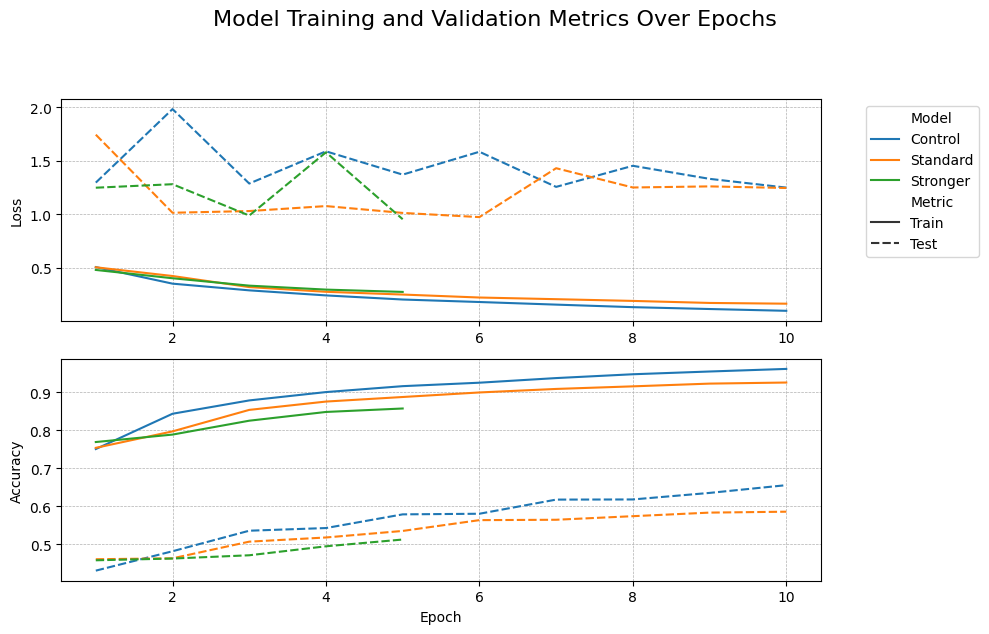

In [10]:
plt.figure(figsize=(10, 6))

def drop_metric(a):
    if "Accuracy" in a:
        return a.replace(" Accuracy", "")
    return a.replace(" Loss", "")

# Loss subplot
ax1 = plt.subplot(2, 1, 1)
goal = ['Train Accuracy', 'Test Accuracy']
to_plot = df_melted.query("Metric not in @goal").copy()
to_plot["Metric"] = to_plot["Metric"].apply(drop_metric)
sns.lineplot(data=to_plot, x='Epoch', y='Metric Value', hue='Model', style='Metric', palette="tab10")
ax1.set_ylabel("Loss")
ax1.set_xlabel("")  # No x label for top subplot
ax1.grid(True, which="both", linestyle="--", linewidth=0.5)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Accuracy subplot
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
to_plot = df_melted.query("Metric in @goal").copy()
to_plot["Metric"] = to_plot["Metric"].apply(drop_metric)
sns.lineplot(data=to_plot, x='Epoch', y='Metric Value', hue='Model', style='Metric', palette="tab10", legend=None)
ax2.set_ylabel("Accuracy")
ax2.grid(True, which="both", linestyle="--", linewidth=0.5)

# Adjusting the layout
plt.suptitle("Model Training and Validation Metrics Over Epochs", fontsize=16, y=1.05)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.savefig("imgs/results.jpg", dpi=300, bbox_inches='tight')


plt.show()